# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

<a id='Intro'></a>

**1 ** <a href='#Question 1'>Is the distribution of body temperatures normal?</a>

**2. **<a href='#Question 3'>Is the sample size large? Are the observations independent?</a>

**3. **<a href='#Question 3'>Is the true population mean really 98.6 degrees F?</a>

**4. **<a href='#Question 4'>Draw a sample of size 10 from the data and repeat both tests.</a>

**5. **<a href='#Question 5'>At what temperature should we consider someone's temperature to be "abnormal"?</a>

**6. **<a href='#Question 6'>Is there a significant difference between males and females in normal temperature?</a>

In [69]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [70]:
# Your work here.

# The following code helps understand what's in the df dataframe
df.info()
df.head()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


temperature    0
gender         0
heart_rate     0
dtype: int64

**The output above shows that there are 130 rows and 3 columns in the dataframe. It also shows that there are no null values.**

In [71]:
# The following code gets the summary statistics of the numerical columns
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


**The summary statistics show that the temperature mean is 98.25 with standard deviation of 0.73 and the range is from 96.30 to 100.80. **

In [72]:
# Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
sns.set()


## <a id='Question 1'>Is the distribution of body temperatures normal?</a>

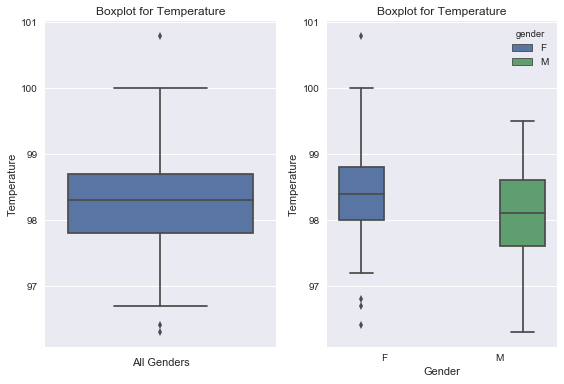

In [73]:
# The code below draws a boxplot of temperature 
plt.subplot(1,2,1)
_ = sns.boxplot(y = 'temperature', data = df)
_ = plt.title('Boxplot for Temperature')
_ = plt.xlabel('All Genders')
_ = plt.ylabel('Temperature')

plt.subplot(1,2,2)
# The code below draws the boxplot of temperature based on gender.
_ = sns.boxplot(x = 'gender', y = 'temperature', hue='gender', data=df)
_ = plt.title('Boxplot for Temperature')
_ = plt.xlabel('Gender')
_ = plt.ylabel('Temperature')
plt.tight_layout()
plt.show()



**The figures above show the boxplot for temperature regardless of gender and also the boxplot for temperature based on gender. None of the values seem to be outliers. It can also be seen that the median for Male body temperature is lower than median for Female body temperature. **

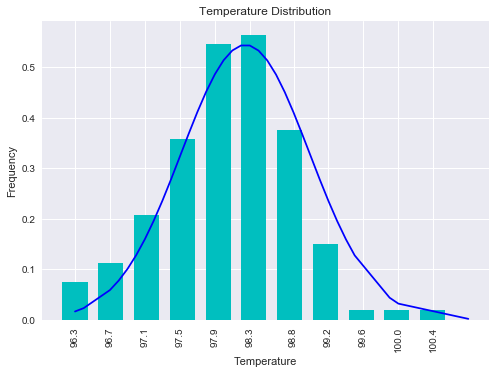

In [74]:
# The code below outputs a histogram of temperature and also theoratical probability density function to show if the temperature
# distribution has a normal bell curve.

temp = sorted(df.temperature)
lens = len(df.temperature)

# bin would be used to get the total number of bins used for the histogram
bin = int(np.sqrt(lens))

# get temperature mean and temperature standard deviation
temp_mean, temp_std = df.temperature.mean(), df.temperature.std()

# get the normal probability distribution function (PDF) for temperature by using the mean and standard deviation from temperature column.
normal = stats.norm.pdf(temp, temp_mean, temp_std)

# Draw the histogram
_ = df['temperature'].hist(bins=bin, rwidth=.7, grid=True, color='c', normed=True, range=(min(df['temperature']), max(df['temperature'])),  align='left')

# Overlay normal PDF 
_ = plt.plot(temp, normal, color='b')

# Set the xticks and labels
_ = plt.xticks(np.around(np.arange(min(df.temperature), max(df.temperature), (max(df.temperature)-min(df.temperature))/bin), decimals=1), rotation=90)
_ = plt.xlabel('Temperature')
_ = plt.ylabel('Frequency')
_ = plt.title('Temperature Distribution')
plt.show()

**The diagram above shows that the histogram follows a normal bell curve indicating that the distribution of temperature is approximately normal. **

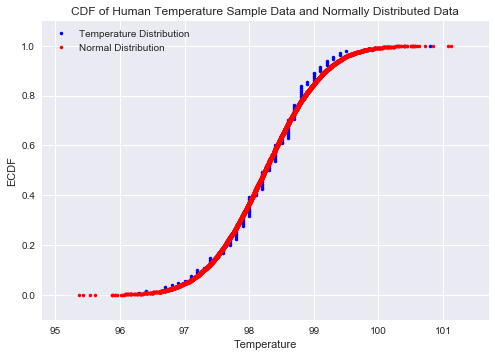

In [75]:
# Below is the code that defines a function "ecdf" that return the sorted data (input parameter) and an array going from 0 to 1
def ecdf(temp):
    temp = np.sort(temp)
    length = len(temp)
    y = np.arange(1, len(temp)+1)/length
    return temp, y

# plot the ecdf of temp
x_temp, y_temp = ecdf(temp)
_ = plt.plot(x_temp, y_temp, linestyle='none',marker='.', color='b')
_ = plt.xlabel('Temperature')
_ = plt.ylabel('ECDF')
_ = plt.title('CDF of Human Temperature Sample Data and Normally Distributed Data')
_ = plt.margins(0.1)

# Seed for the Random number generator
np.random.seed(42)
# plot the ecdf of normally distributed data that has the same mean and std. dev. as the human temp data
norm_temp = np.random.normal(temp_mean, temp_std,10000)
x_norm, y_norm = ecdf(norm_temp)
_ = plt.plot(x_norm, y_norm, linestyle='none', marker='.', color='r')
plt.legend(('Temperature Distribution', 'Normal Distribution'), loc=0)
plt.show()
   
    


**The diagram above shows the Cumulative Distribution Function of both the Temperature Distribution (Blue) and Normal Distribution (Red) calculated from the Temperature mean and Temperature Standard Deviation. It can be seen that both the distribution align well enough. This is another way to show that the Human Temperature data is normally distributed.**

<a href='#Intro'>Back to Intro</a>

## <a id='Question 2'>Is the sample size large? Are the observations independent?</a>

**As per the Central Limit Theorem the sample size of 30 or more is considered to be large enough for it to be normally distributed. The number of observations in this dataset is 130 which can be considered sufficiently large. Also these observations are temperatures of human body and there is no indication that these observations are dependent upon each other. Hence it is safe to assume that these observations are independent. **

<a href='#Intro'>Back to Intro</a>

## <a id='Question 3'>Is the true population mean really 98.6 degrees F?</a>

**The normal human body temperature is considered to be 98.6 degree F. Since the sample observation mean would be compared to the population mean we would use one-sample test. If we were to conduct comparison test between two populations then we would choose two-sample test. **

**We do not know the standard deviation of the population. Since this information is not known, it is appropriate to use the t test statistic rather than the z test statistic. **

**The hypothesis that we would be testing is as follows:**

**Null Hypothesis:**
* H0: μ = 98.6

**Alternative Hypothesis:**
* H1: μ ≠ 98.6

**Significance Level:**
* α = 0.05

In [76]:
# Perform a 1 Sample Test to get the t statistics and p value
t_stat = stats.ttest_1samp(temp, 98.6)[0]
p_stat = stats.ttest_1samp(temp, 98.6)[1]
print ('T statistics : {}'.format(t_stat))
print ('P value : {}'.format(p_stat * 2))

print('Is p value below the significant alpha level: ', (p_stat * 2 < 0.05))

T statistics : -5.454823292364077
P value : 4.821264083122016e-07
Is p value below the significant alpha level:  True


In [77]:
# Obtain the critical value corresponding to the significance level and degree of freedom
# q = α/2 (0.05/2) since it is a two tail test
lower = stats.t.ppf(q=0.025, df=len(temp)-1)
upper = stats.t.ppf(q=0.975, df=len(temp)-1)
print('Lower Bound: {}'.format(lower))
print('Upper Bound: {}'.format(upper))

print('Is t statistics below lower bound or above the upper bound : ', (t_stat < lower) | (t_stat > upper))

Lower Bound: -1.9785244914586055
Upper Bound: 1.978524491458605
Is t statistics below lower bound or above the upper bound :  True


In [78]:
# Check t probability distribution at a much lower significance level of 0.005
lower = stats.t.ppf(q=0.0025, df = len(temp)-1)
upper = stats.t.ppf(q=0.9975, df = len(temp)-1)
print('Lower Bound: {}'.format(lower))
print('Upper Bound: {}'.format(upper))

print('Is t statistics below lower bound or above the upper bound : ', (t_stat < lower) | (t_stat > upper))

Lower Bound: -2.856119554241514
Upper Bound: 2.8561195542415216
Is t statistics below lower bound or above the upper bound :  True


**It can be seen that the T statistics is less than the Lower bound of the critical value corresponding to the significance level of 0.05. It can also be seen that the T statistics is less than the lower bound of the t distribution corresponding to the significance level of 0.005 (99.5% confidence level). Hence, we can reject the null hypothesis in favor of the alternative hypothesis. At 0.05 significance level the normal human body temperature is not 98.6.  **

**Since this is a two tail test the p value is multiplied by 2. Since this p value (4.82e-07) is less than the significant alpha level (0.05) we would reject the null hypothesis in favor of the alternative hypothesis. We reach the same conclusion whether we use the critical value approach or the p value approach. At 0.05 significance level the normal human body temperature is not 98.6. **

**Although it is appropriate to use T statistics for the given data, a Z statistics can be used by approximating the standard deviation.**

In [79]:
# Calculate the z statistics
# Since the test is a two tailed test, the p value should be multiplied by 2
std_err = temp_std/np.sqrt(lens)
z_stat = (temp_mean - 98.6)/std_err
p_stat = stats.norm.cdf(z_stat) * 2

print('Z stat: {}'.format(z_stat))
print('P Value: {}'.format(p_stat))

Z stat: -5.454823292364079
P Value: 4.90215701411338e-08


In [80]:
# Find the lower and upper bound of the critical value corresponding to the alpha level 0.05.
lower = stats.norm.ppf(q=0.025)
upper = stats.norm.ppf(q=0.975)

print('Lower Bound: {}'.format(lower))
print('Upper Bound: {}'.format(upper))

Lower Bound: -1.9599639845400545
Upper Bound: 1.959963984540054


**Since the Z stat is lower than the lower bound, reject the null hypothesis in favor of the alternative hypothesis. We reach the same conclusion regarding the mean of the human body temperature regardless of the test statistics we use. It can also be noticed that the T statistics and Z statistics were both approximately -5.45 and hence not much difference between both of them.**

<a href='#Intro'>Back to Intro</a>

## <a id='Question 4'>Draw a sample of size 10 from the data and repeat both tests.</a>

**We can draw a sample of size 10 from the data and perform the t and z statistics. T statistics would be appropriate to use in this case since we do not know the population standard deviation. But the population standard deviation can be approximated and this appromixated standard deviation could be used for getting the z statistics. We have the same null and alternative hypothesis with the α = 0.05.**

In [81]:
# Seed for the random number generator
np.random.seed(42)

# Randomly select 10 temperature data from the provided data set.
sample = np.random.choice(df.temperature, size=10)

In [82]:
# Obtain the T statistics and the corresponding p value
t_stat = stats.ttest_1samp(sample, 98.6)[0]
p_stat = stats.ttest_1samp(sample, 98.6)[1]
print('T Statistics: {}'.format(t_stat))
print('P Value: {}'.format(p_stat * 2))

print('Is p value below the alpha level of 0.05 : ', (p_stat * 2 < 0.05))

T Statistics: -3.0934479202257976
P Value: 0.025715409209618727
Is p value below the alpha level of 0.05 :  True


In [83]:
# Find the lower and upper bound for the critical value corresponding to the alpha level of 0.05.
lower = stats.t.ppf(q=0.025, df=len(sample)-1)
upper = stats.t.ppf(q=0.975, df=len(sample)-1)
print('Lower Bound: {}'.format(lower))
print('Upper Bound: {}'.format(upper))

print('Is t statistics below the lower bound or above the upper bound : ', (t_stat < lower) | (t_stat > upper))

Lower Bound: -2.262157162740992
Upper Bound: 2.2621571627409915
Is t statistics below the lower bound or above the upper bound :  True


In [84]:
# Find the z statistics and p value
se = np.std(sample)/np.sqrt(len(sample))
z_stat = (np.mean(sample) - 98.6)/se
p_stat = stats.norm.cdf(z_stat) * 2
print('Z Statistics: {}'.format(z_stat))
print('P Value: {}'.format(p_stat))


print('Is p value below the alpha level of 0.05 : ', (p_stat < 0.05))

Z Statistics: -3.260780417008125
P Value: 0.001111060453904971
Is p value below the alpha level of 0.05 :  True


In [85]:
# Find the lower and upper bound for the critical value corresponding to the alpha level of 0.05.
lower = stats.norm.ppf(q=0.025)
upper = stats.norm.ppf(q=0.975)
print('Lower Bound: {}'.format(lower))
print('Upper Bound: {}'.format(upper))
print('Is z statistics below the lower bound or above the upper bound : ', (z_stat < lower) | (z_stat > upper))

Lower Bound: -1.9599639845400545
Upper Bound: 1.959963984540054
Is z statistics below the lower bound or above the upper bound :  True


**It can be seen that both the T statistics and Z statistics are lower than their respective lower bounds. Since this is the case we would reject the null hypothesis in favor of the alternative hypothesis. At 0.05 alpha level the mean of the human body temperature is not 98.6. It can be observed that the t statistics (-3.09) is higher than the Z statistics (-3.26).**

<a href='#Intro'>Back to Intro</a>

## <a id='Question 5'>At what temperature should we consider someone's temperature to be "abnormal"?</a>

In [86]:
# Start by computing the margin of error and confidence interval.
# We have been looking at the null hypothesis at 95% confidence level. 
z_crit = stats.norm.ppf(q=0.95)
z_crit

1.6448536269514722

In [87]:
# Margin of Error is calculated by multiplying z_critical and standard error
moe = z_crit * std_err
moe

0.10577135326480434

In [88]:
conf_int = np.array([temp_mean - moe, temp_mean + moe])
print('95% Confidence Interval: ', conf_int)

95% Confidence Interval:  [ 98.14345942  98.35500212]


**Although the 95% Confidence Interval shown above provides an interval within which the human body temperature could be considered normal, it might not be the best choice to consider someone's temperature to be not normal (or abnormal). Anything outside the confidence interval should not be considered abnormal. We should look at an individual's body temperature against the prediction interval whose mean is the mean temperature provided in the data.  **

In [89]:
pred_int = stats.norm.interval(0.95, temp_mean, temp_std)
print('95% Prediction Interval: ', pred_int)

95% Prediction Interval:  (96.812218185403111, 99.686243353058444)


**Anything outside the 95% Prediction Interval can be considered abnormal.**

<a href='#Intro'>Back to Intro</a>

## <a id='Question 6'>Is there a significant difference between males and females in normal temperature?</a>

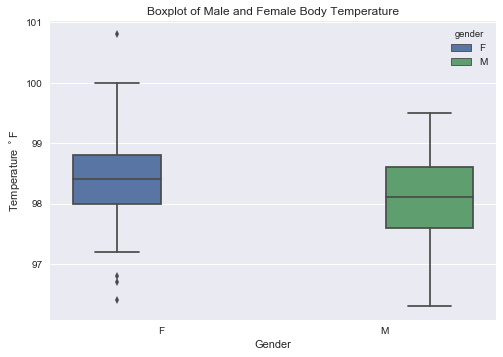

Mean of Female body temperature: 98.39384615384613
Mean of Male body temperature: 98.1046153846154


In [90]:
# Is there a significant difference between males and females in normal temperature?
# What test did you use and why?
# Write a story with your conclusion in the context of the original problem.
fem_temp = df.temperature[df.gender == 'F']
male_temp = df.temperature[df.gender == 'M']
fem_len = len(fem_temp)
male_len = len(male_temp)
fem_mean = np.mean(fem_temp)
male_mean = np.mean(male_temp)

_ = sns.boxplot(x = 'gender', y = 'temperature', data=df, hue='gender')
_ = plt.xlabel('Gender')
_ = plt.ylabel('Temperature $^\circ$F')
_ = plt.title('Boxplot of Male and Female Body Temperature')
plt.show()

print('Mean of Female body temperature:', fem_mean)
print('Mean of Male body temperature:', male_mean)

**It can be seen from the box plot that the mean of the female body temperature is slightly higher than the mean of the male body temperature. However, we need to figure out whether the difference is statistically large enough to be considered significantly different. The test would be comparing the mean of female and male body temperature. Hence it would be 2 sample test.**

**Null Hypothesis:** There is no significant difference between the male and female human body temperatures.

* H0:μ females−μ males=0

**Alternate Hypothesis:** 

* H1:μ females−μ males≠0

**Significance Level:**

* α = 0.05

In [91]:
# define a function that takes in 2 data sets and returns 2 data sets that were permutation samples of the data sets provided
# as parameters for the function. 
def permute_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permute_data = np.random.permutation(data)
    permute_sample1 = permute_data[:len(data1)]
    permute_sample2 = permute_data[len(data1):]
    
    return permute_sample1, permute_sample2
    
# define a function that takes in 2 data sets, a function, and replicate size and returns the calculated (based on the function
# provided as the parameter) replicate.
def draw_permute_replicate(data1, data2, func, size=1):
    permute_replicate = np.empty(size)
    for i in range(size):
        permute_sample1, permute_sample2 = permute_sample(data1, data2)
        permute_replicate[i] = func(permute_sample1, permute_sample2)
    return permute_replicate

# define a function that takes in 2 data sets and returns the mean difference between the two
def diff_mean(data1, data2):
    return np.abs(np.mean(data1) - np.mean(data2))



In [92]:
np.random.seed(42)

# calculate the actual difference seen in the female body temperature and male body temperature
emp_diff = diff_mean(fem_temp, male_temp)

# get the permuation replicate of size 10000
permute_rep = draw_permute_replicate(fem_temp, male_temp, diff_mean, 10000)

p = np.sum(permute_rep >= emp_diff)/len(permute_rep)

print('Difference between the mean of female body temperature and mean of male body temperature: ', emp_diff)
print('P Value: ', p*2)

Difference between the mean of female body temperature and mean of male body temperature:  0.289230769231
P Value:  0.0496


**Since the p-value of 0.0496 is lower than the alpha level of 0.05, we would reject the null hypothesis in favor of the alternative hypothesis. This suggests that the difference between the Female body temperature and Male body temperature is not equal. However, the actual mean difference between the Female body temperature and Male body temperature is not that big (only 0.289 degrees F). **

In [93]:
t_stat = stats.ttest_ind(fem_temp, male_temp)[0]
p_value = stats.ttest_ind(fem_temp, male_temp)[1]
print('T statistics: {}'.format(t_stat), '\nP-Value: {}'.format(p_value*2))

T statistics: 2.2854345381656103 
P-Value: 0.04786376624479122


In [94]:
lower = stats.t.ppf(q=0.025, df=len(fem_temp)-1)
upper = stats.t.ppf(q=0.975, df=len(fem_temp)-1)
print('Lower Bound: {}'.format(lower), '\nUpper Bound: {}'.format(upper))

Lower Bound: -1.9977296536259739 
Upper Bound: 1.9977296536259734


**Since the T statistics is above the upper bound, we would reject the null hypothesis in favor of the alternative hypothesis. This test also suggests that the difference between the Female and Male body temperature is not equal. **

**From the t test and z test statistics it can be seen that the mean of the male and female body temperature are not equal. In general Female body temperatures are a little bit higher than the male body temperature. It was also found that the normal body temperature is not actually 98.6 degrees F. As long as the body temperature of a person is between the 95% prediction interval of human temperature, 96.8 to 99.7 degrees F, there shouldn't be a cause of concern. However it might be considered abnormal if the body temperature is found below or above the 95% prediction interval.  **

<a href='#Intro'>Back to Intro</a>